# Imports


In [1]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("dynamic-clustering"):
    os.chdir("..")
    print(os.getcwd())

c:\Users\manse\OneDrive\Desktop\dynamic-clustering


In [2]:
import numpy as np
from scripts.clusterer import CluStream
from scripts.dynamic_clusterer import DynamicClusterer
from scripts.utils import get_colors, clean_directory

from river import drift

In [ ]:
colors = get_colors()


def import_and_shuffle_csv(file_path):
    final_2d_data = np.loadtxt(file_path, delimiter=",")

    reference_data = final_2d_data[:1000]
    np.random.shuffle(reference_data)

    batch1 = final_2d_data[1000:1200]
    np.random.shuffle(batch1)

    batch2 = final_2d_data[1200:1400]
    np.random.shuffle(batch2)

    batch3 = final_2d_data[1400:1600]
    np.random.shuffle(batch3)

    batch4 = final_2d_data[1600:1800]
    np.random.shuffle(batch4)

    batch5 = final_2d_data[1800:2000]
    np.random.shuffle(batch5)

    return reference_data, [batch1, batch2, batch3, batch4, batch5]

number of colors defined: 20


In [4]:
# file_path, drift_type = "./data/final_2d_data_brightness.csv", "BRIGHTNESS"
file_path, drift_type = './data/final_2d_data_contrast.csv', 'CONTRAST'
# file_path, drift_type = './data/final_2d_data_saturation.csv', 'SATURATION'
# file_path, drift_type = './data/final_2d_data_gaussian_noise.csv', 'GAUSSIAN_NOISE'
reference_data, batches = import_and_shuffle_csv(file_path)

full_prod_data = np.concatenate(batches, axis=0)

ids = []

In [5]:
def init_dynamic_clusterer(data=reference_data, threshold=5):
    clustream_model = CluStream(
        max_micro_clusters=200,
        time_window=100,
        seed=0,
    )
    drift_detector = drift.PageHinkley(delta=0.0005, threshold=threshold)

    dynamic_clusterer = DynamicClusterer(
        data,
        clustream_model,
        drift_detector,
        colors,
        x_limits=(-10, 20),
        y_limits=(0, 15),
        threshold=threshold,
    )

    return dynamic_clusterer

New model created - id: 88603
(id: 0 - cen: [-5.24  3.01] - rad: 1.01)
(id: 1 - cen: [-1.03  6.91] - rad: 1.05)
(id: 2 - cen: [9.4 5.6] - rad: 0.99)
<!> Change detected! Possible input drift at timestamp 11 ----> Apply macroclustering <!>



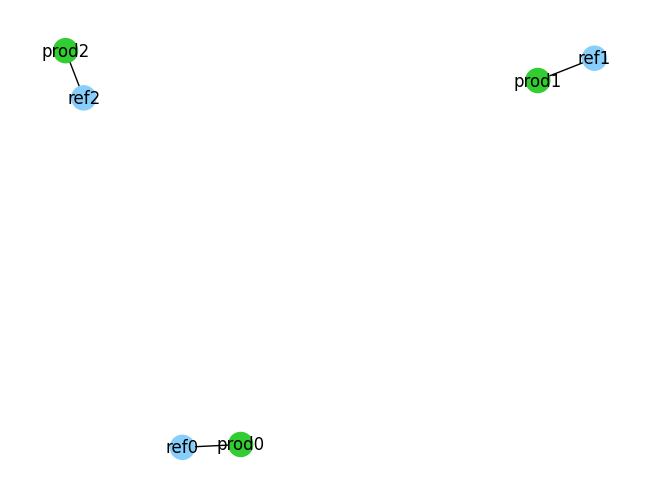

(id: 0 - cen: [-5.24  3.01] - rad: 1.01) SURVIVED as (id: 0 - cen: [-5.22  3.02] - rad: 1.0) (score: 0.9940099832326321)
(id: 1 - cen: [-1.03  6.91] - rad: 1.05) SURVIVED as (id: 1 - cen: [-1.06  6.88] - rad: 1.06) (score: 0.9849887070699936)
(id: 2 - cen: [9.4 5.6] - rad: 0.99) SURVIVED as (id: 2 - cen: [9.54 5.79] - rad: 1.02) (score: 0.9211363616986543)
Final macroclusters:
(id: 0 - cen: [-5.22  3.02] - rad: 1.0)
(id: 1 - cen: [-1.06  6.88] - rad: 1.06)
(id: 2 - cen: [9.54 5.79] - rad: 1.02)

-----------------------------------------------------------------------------------



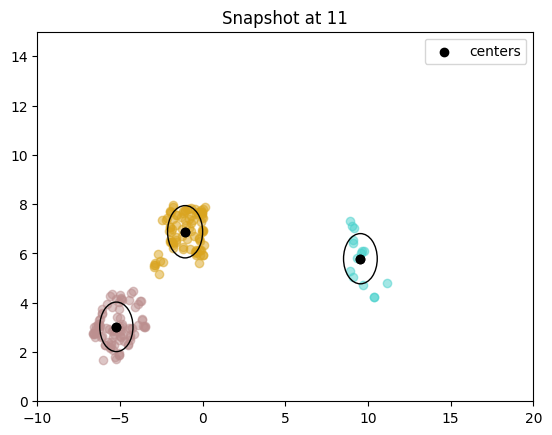

<Figure size 1000x1000 with 0 Axes>

<!> Change detected! Possible input drift at timestamp 164 ----> Apply macroclustering <!>



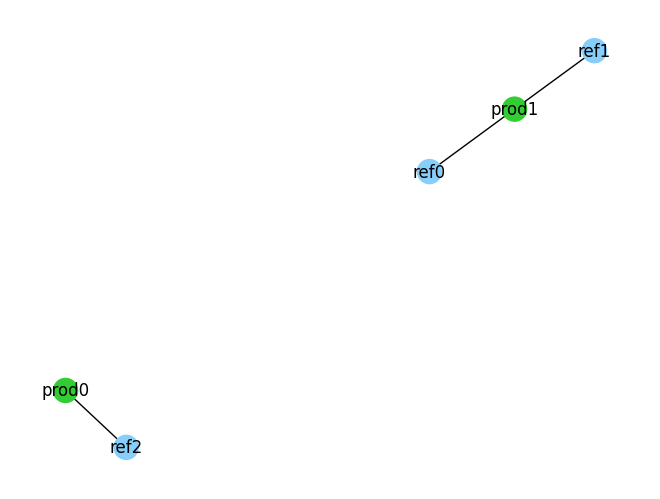

(id: 2 - cen: [9.54 5.79] - rad: 1.02) SURVIVED as (id: 2 - cen: [9.65 5.61] - rad: 1.05) (score: 0.9325055206115637)
(!) [0, 1] are MERGED in (id: 3 - cen: [-3.2   4.83] - rad: 2.85) (overlapping scores: [np.float64(0.6138212769974021), np.float64(0.5913729034654432)])
Final macroclusters:
(id: 2 - cen: [9.65 5.61] - rad: 1.05)
(id: 3 - cen: [-3.2   4.83] - rad: 2.85)

-----------------------------------------------------------------------------------



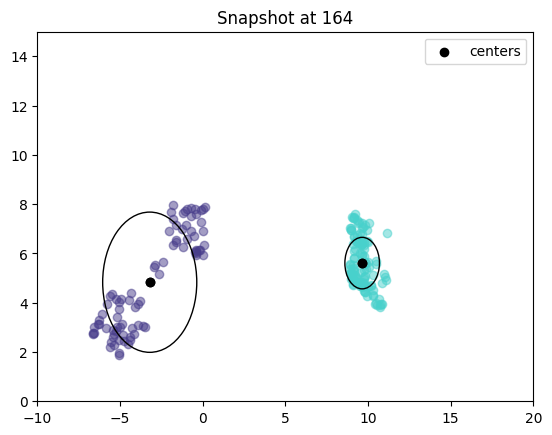

<Figure size 1000x1000 with 0 Axes>

<!> Change detected! Possible input drift at timestamp 212 ----> Apply macroclustering <!>



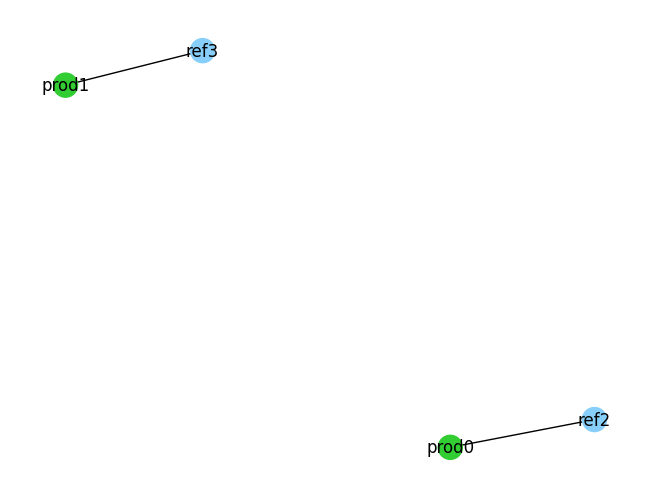

(id: 2 - cen: [9.65 5.61] - rad: 1.05) SURVIVED as (id: 2 - cen: [9.79 5.78] - rad: 1.2) (score: 0.9333861091016239)
(id: 3 - cen: [-3.2   4.83] - rad: 2.85) SURVIVED as (id: 3 - cen: [-3.18  4.86] - rad: 2.85) (score: 0.9960806607538628)
Final macroclusters:
(id: 2 - cen: [9.79 5.78] - rad: 1.2)
(id: 3 - cen: [-3.18  4.86] - rad: 2.85)

-----------------------------------------------------------------------------------



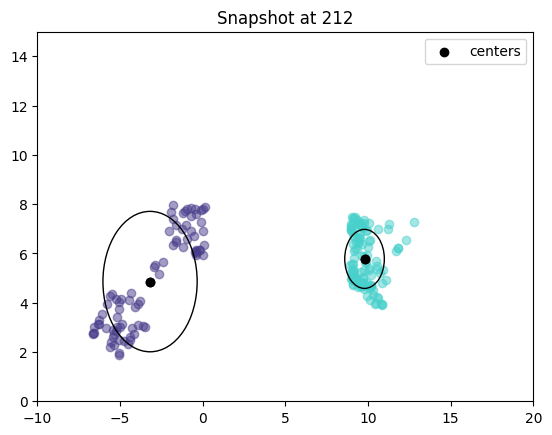

<Figure size 1000x1000 with 0 Axes>

<!> Change detected! Possible input drift at timestamp 407 ----> Apply macroclustering <!>



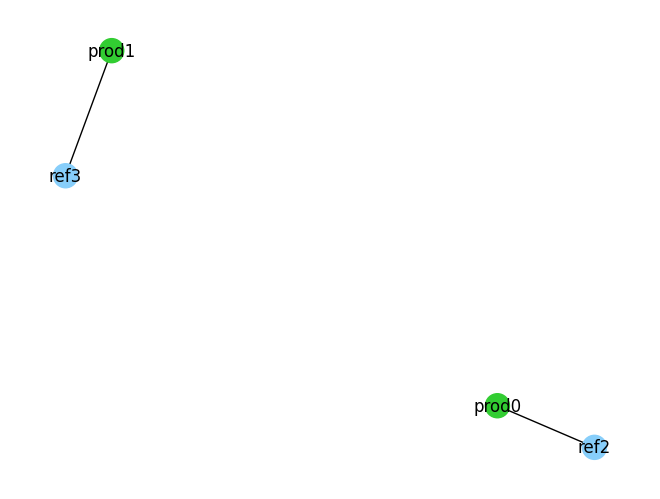

(id: 2 - cen: [9.79 5.78] - rad: 1.2) SURVIVED as (id: 2 - cen: [10.52  5.99] - rad: 1.16) (score: 0.8007575000960555)
(id: 3 - cen: [-3.18  4.86] - rad: 2.85) SURVIVED as (id: 3 - cen: [-3.17  4.87] - rad: 2.87) (score: 0.9979737451336462)
Final macroclusters:
(id: 2 - cen: [10.52  5.99] - rad: 1.16)
(id: 3 - cen: [-3.17  4.87] - rad: 2.87)

-----------------------------------------------------------------------------------



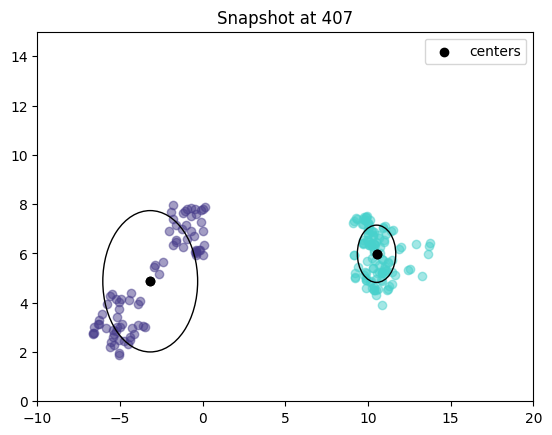

<Figure size 1000x1000 with 0 Axes>

<!> Change detected! Possible input drift at timestamp 628 ----> Apply macroclustering <!>



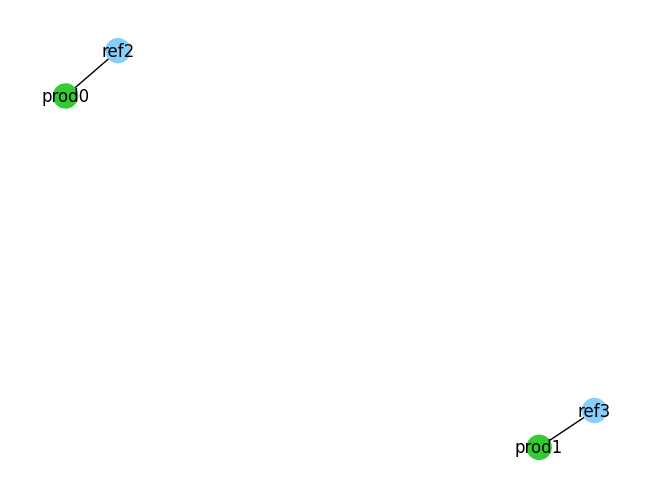

(id: 2 - cen: [10.52  5.99] - rad: 1.16) SURVIVED as (id: 2 - cen: [11.6   6.14] - rad: 1.35) (score: 0.7393262675700258)
(id: 3 - cen: [-3.17  4.87] - rad: 2.87) SURVIVED as (id: 3 - cen: [-3.17  4.87] - rad: 2.87) (score: 0.9999999999999986)
Final macroclusters:
(id: 2 - cen: [11.6   6.14] - rad: 1.35)
(id: 3 - cen: [-3.17  4.87] - rad: 2.87)

-----------------------------------------------------------------------------------



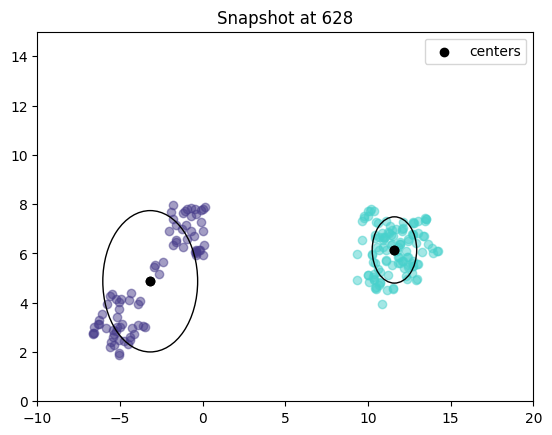

<Figure size 1000x1000 with 0 Axes>

Batch Finished ----> Apply macroclustering



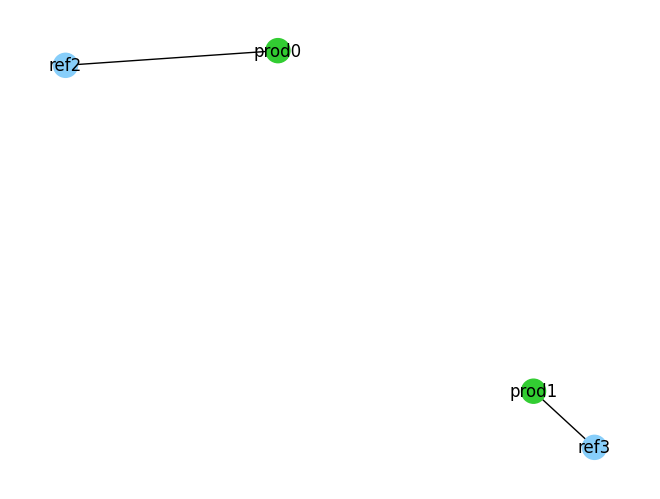

(id: 2 - cen: [11.6   6.14] - rad: 1.35) SURVIVED as (id: 2 - cen: [12.85  6.29] - rad: 1.04) (score: 0.6929499743537793)
(id: 3 - cen: [-3.17  4.87] - rad: 2.87) SURVIVED as (id: 3 - cen: [-3.17  4.87] - rad: 2.87) (score: 0.9999999999999974)
Final macroclusters:
(id: 2 - cen: [12.85  6.29] - rad: 1.04)
(id: 3 - cen: [-3.17  4.87] - rad: 2.87)

-----------------------------------------------------------------------------------



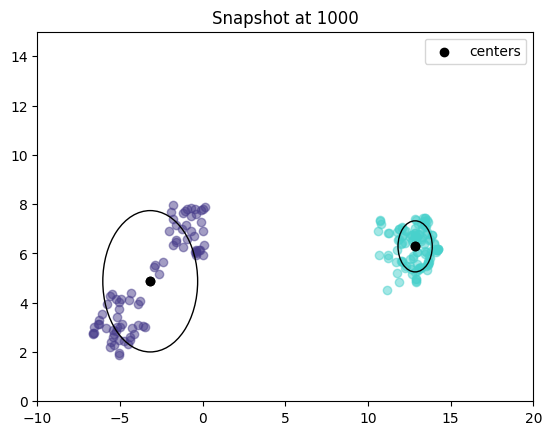

<Figure size 1000x1000 with 0 Axes>

In [ ]:
clustream = init_dynamic_clusterer()

id = clustream.get_id()
ids.append(id)

clustream.receive_prod(full_prod_data)
clustream.fit_prod_data(plot_img=True, print_graph=True, macroclustering_at_end=True)

# clustream.draw_snapshots()
clustream.draw_gif(title=drift_type)

In [ ]:
# Clean directory

for id in ids:
    ids.remove(id)
    clean_directory(f"./plots/{id}")
    print(f"Deleted {id}")


Directory './plots/88603' and its contents removed successfully.
Deleted 88603
